# Cardiovascular Study

## Objective:
The task is to predict whether patient have 10 year risk of coronary heart disease CHD or not.

### Source:
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

### Data Description
#### Demographic:
• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous)
#### Behavioral
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous)
#### Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
#### Medical(current)
• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous)

• Glucose: glucose level (Continuous)
#### Predict variable (desired target)
• 10 year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

##  Reviewing the dataset
### Importing the libraries

In [984]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Loading and overview of the dataset

In [985]:

chd_data = pd.read_csv("/Users/adriennficsor/Desktop/Turing/M4S4/Graded task/train.csv", index_col=[0])
chd_data.head(10)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0


In [986]:
chd_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [987]:
chd_data.describe().round(3)

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000,3303.000,3368.000,3346.00,3390.000,3390.000,3390.000,3352.000,3390.000,3390.000,3376.000,3389.000,3086.000,3390.000
mean,49.542,1.971,9.069,0.03,0.006,0.315,0.026,237.074,132.601,82.883,25.795,75.977,82.087,0.151
std,8.593,1.019,11.879,0.17,0.080,0.465,0.158,45.247,22.292,12.024,4.115,11.972,24.245,0.358
min,32.000,1.000,0.000,0.00,0.000,0.000,0.000,107.000,83.500,48.000,15.960,45.000,40.000,0.000
25%,42.000,1.000,0.000,0.00,0.000,0.000,0.000,206.000,117.000,74.500,23.020,68.000,71.000,0.000
50%,49.000,2.000,0.000,0.00,0.000,0.000,0.000,234.000,128.500,82.000,25.380,75.000,78.000,0.000
75%,56.000,3.000,20.000,0.00,0.000,1.000,0.000,264.000,144.000,90.000,28.040,83.000,87.000,0.000
max,70.000,4.000,70.000,1.00,1.000,1.000,1.000,696.000,295.000,142.500,56.800,143.000,394.000,1.000


We can see that about 15% of the patients had a heart disease.

## Data cleaning
### Handling missing values

In [988]:
null_values = chd_data.isnull().sum()
show_null_values= null_values[null_values>0]
show_null_values

education      87
cigsPerDay     22
BPMeds         44
totChol        38
BMI            14
heartRate       1
glucose       304
dtype: int64

In [989]:
# education has categorical values, but it does not give us further information
chd_data.drop(columns=["education"], inplace=True)

# other features are continuous numbers, we can use the median values
missing_value_columns = ["cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", "glucose"]
for col in missing_value_columns:
    chd_data.fillna({col: chd_data[col].median()}, inplace=True)

chd_data.isnull().sum()


age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Checking for duplicates

In [990]:
chd_data.duplicated().sum()

0

There are no duplicates in the dataset.

### Handling outliers

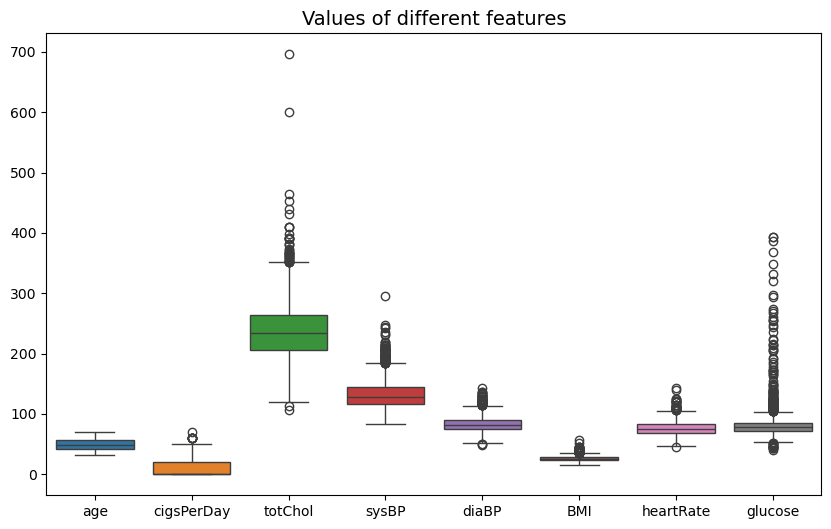

In [991]:
plt.figure(figsize=(10,6))
sns.boxplot(data=chd_data[["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]])
plt.title("Values of different features", fontsize=14)
plt.show()

In [992]:
chd_data["totChol"] = chd_data["totChol"].where(chd_data["totChol"] <= 500, 500)
sysBP_cap = chd_data["sysBP"].sort_values(ascending=False).iloc[1]
chd_data["sysBP"] = chd_data["sysBP"].replace(chd_data["sysBP"].max(), sysBP_cap)
chd_data.describe().round(3)

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000,3390.000,3390.000,3390.000,3390.000,3390.000,3390.000,3390.000,3390.000,3390.000,3390.000,3390.000,3390.000
mean,49.542,9.011,0.029,0.006,0.315,0.026,236.953,132.587,82.883,25.793,75.977,81.720,0.151
std,8.593,11.863,0.169,0.080,0.465,0.158,44.320,22.205,12.024,4.107,11.970,23.161,0.358
min,32.000,0.000,0.000,0.000,0.000,0.000,107.000,83.500,48.000,15.960,45.000,40.000,0.000
25%,42.000,0.000,0.000,0.000,0.000,0.000,206.000,117.000,74.500,23.030,68.000,72.000,0.000
50%,49.000,0.000,0.000,0.000,0.000,0.000,234.000,128.500,82.000,25.380,75.000,78.000,0.000
75%,56.000,20.000,0.000,0.000,1.000,0.000,264.000,144.000,90.000,27.998,83.000,85.000,0.000
max,70.000,70.000,1.000,1.000,1.000,1.000,500.000,248.000,142.500,56.800,143.000,394.000,1.000


### Unifying binary values

In [993]:
# Female = 0, Male = 1
sex_values = {"F": 0, "M": 1}
chd_data["sex"] = chd_data["sex"].map(sex_values)
# Non-smoker = 0, Smoker = 1
smoker_values = {"NO": 0, "YES": 1}
chd_data["is_smoking"] = chd_data["is_smoking"].map(smoker_values)
chd_data.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


## Exploratory Data Analysis 

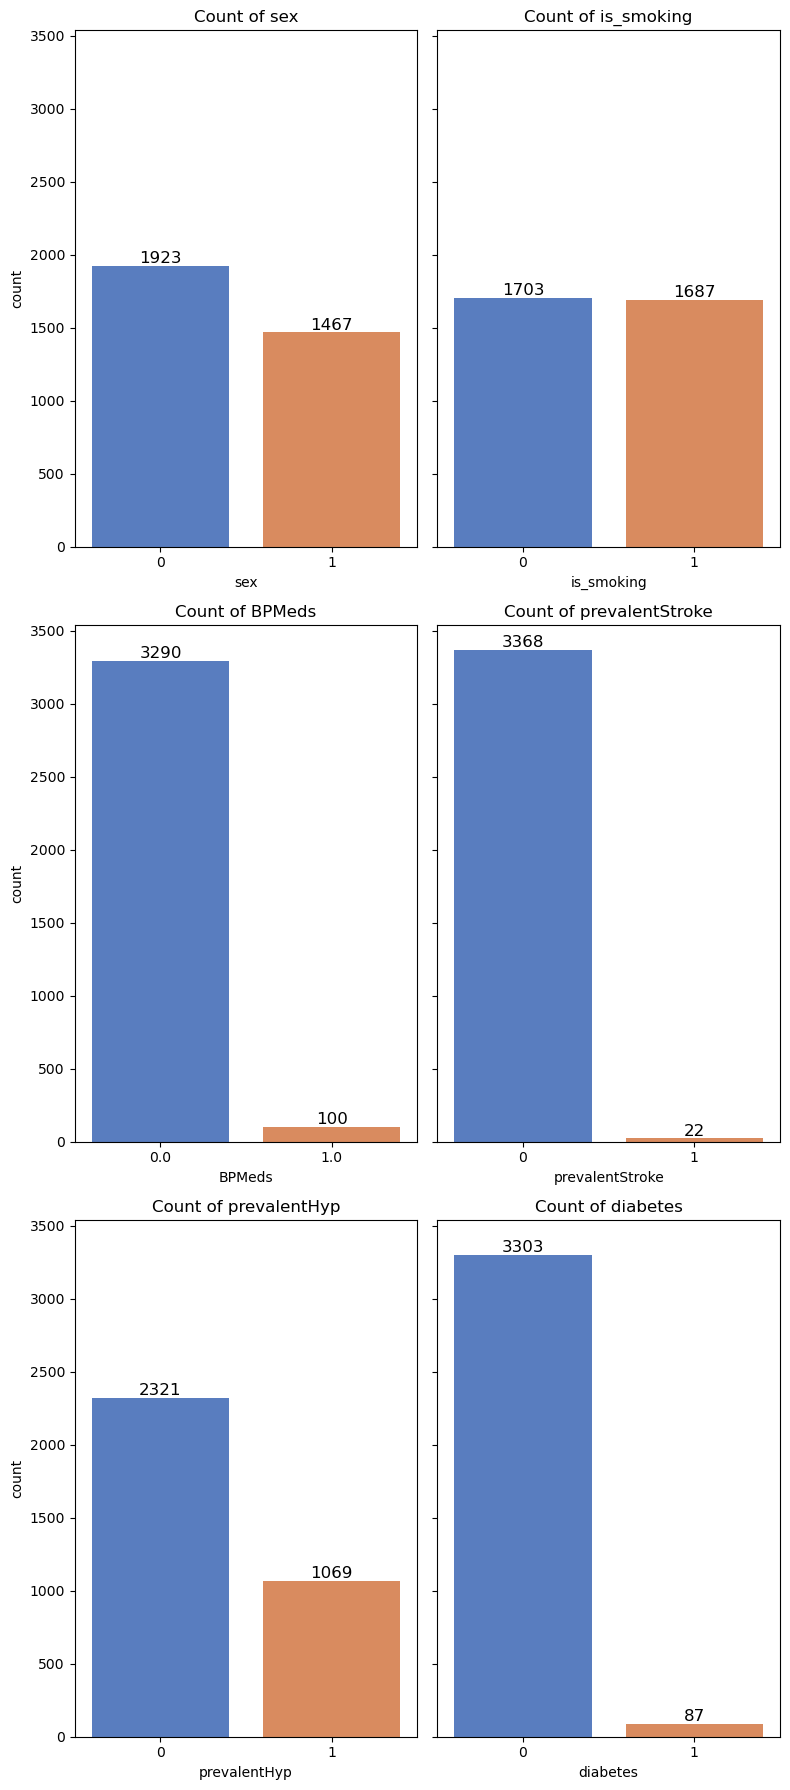

In [994]:
nominal_features = ["sex", "is_smoking", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]

fig, axes = plt.subplots(3, 2, figsize=(8, 18), sharey=True)

for i, feature in enumerate(nominal_features):
    row = i // 2
    col = i % 2
    sns.countplot(data=chd_data, 
                  x=feature,
                  hue=feature, 
                  ax=axes[row, col],
                  legend=False,
                  palette="muted") 
    axes[row, col].set_title(f'Count of {feature}')  

    # Data labels
    for patch in axes[row, col].patches:
        height = patch.get_height()
        axes[row, col].text(patch.get_x() + patch.get_width() / 2., 
                     height + 20,
                     int(height),
                     ha='center', 
                     fontsize=12)

plt.tight_layout()
plt.show()

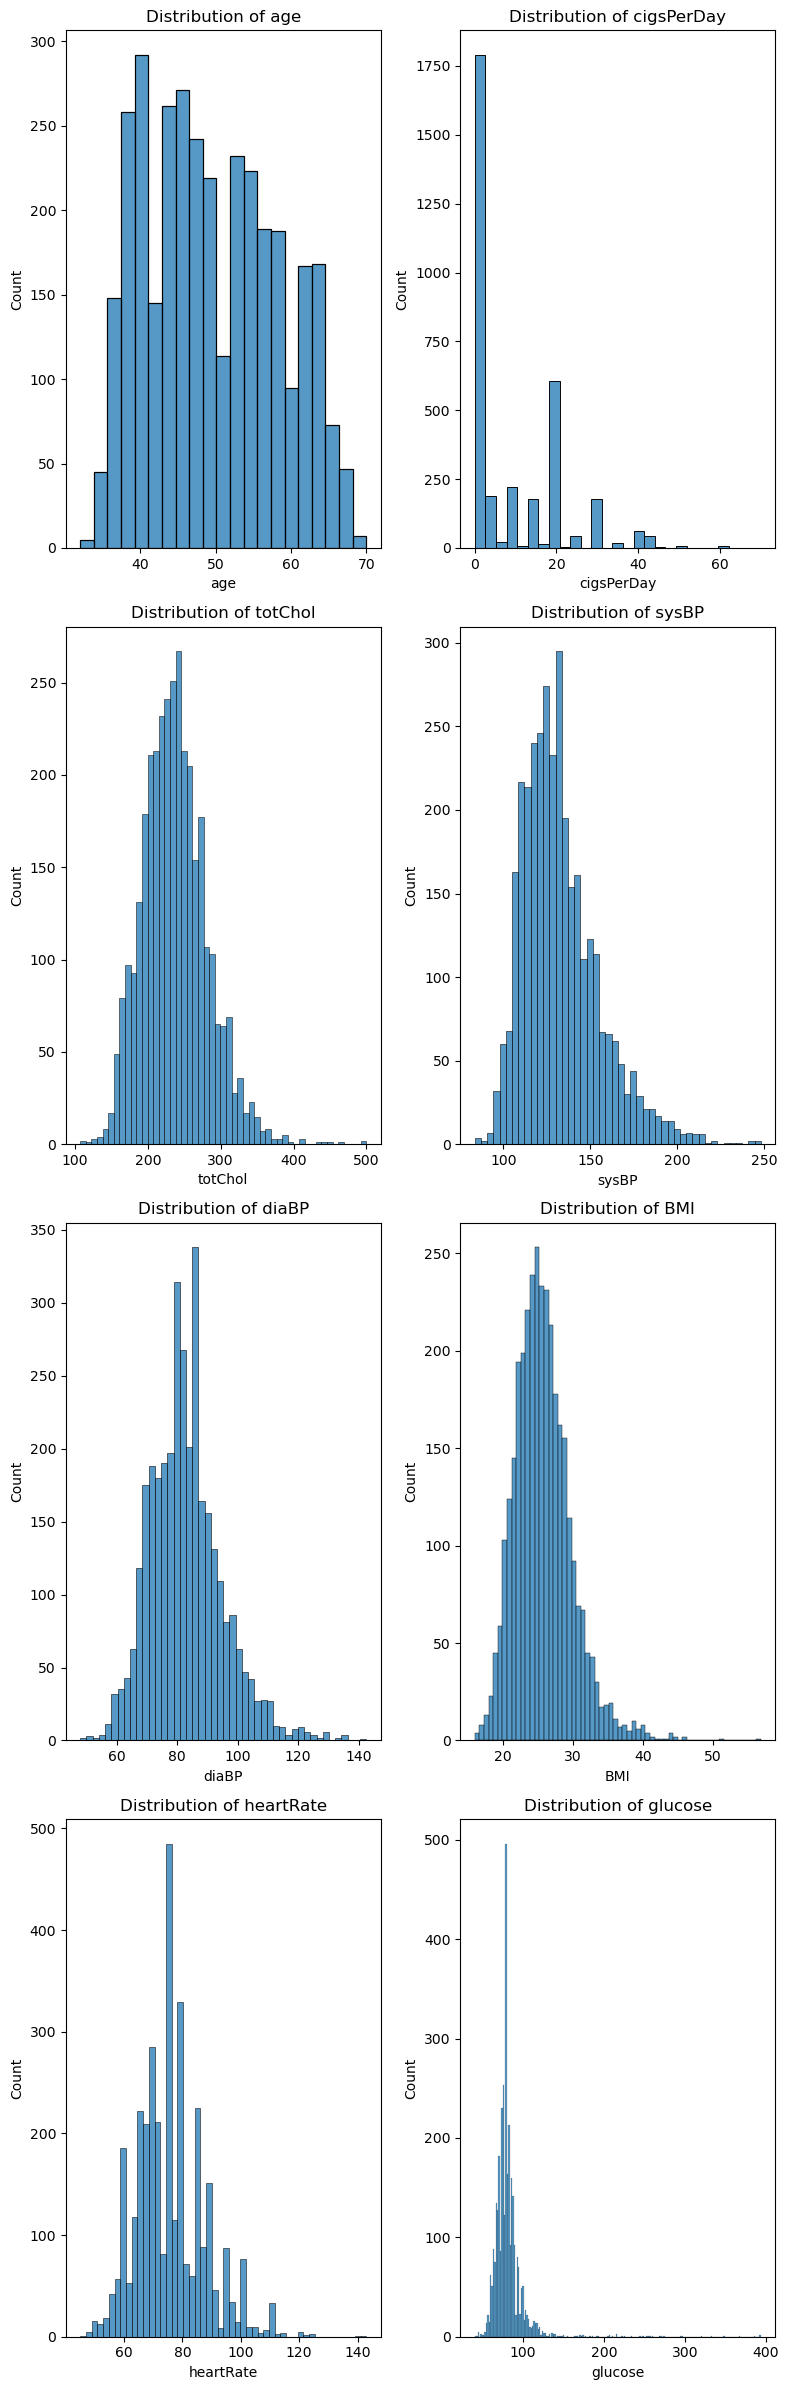

In [995]:
continuous_features = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]

fig, axes = plt.subplots(4, 2, figsize=(8, 24))

for i, feature in enumerate(continuous_features):
    row = i // 2
    col = i % 2
    sns.histplot(data=chd_data, 
                  x=feature,
                  ax=axes[row, col],
                  legend=False,) 
    axes[row, col].set_title(f'Distribution of {feature}')  

plt.tight_layout()
plt.show()

In [996]:
# fig, axes = plt.subplots(4, 2, figsize=(8, 24), sharey=True)

# for i, feature in enumerate(continuous_features):
#     row = i // 2
#     col = i % 2
#     sns.histplot(data=chd_data, 
#                   x=feature,
#                   ax=axes[row, col],
#                   legend=False,) 
#     axes[row, col].set_title(f'Distribution of {feature}')  

# plt.tight_layout()
# plt.show()

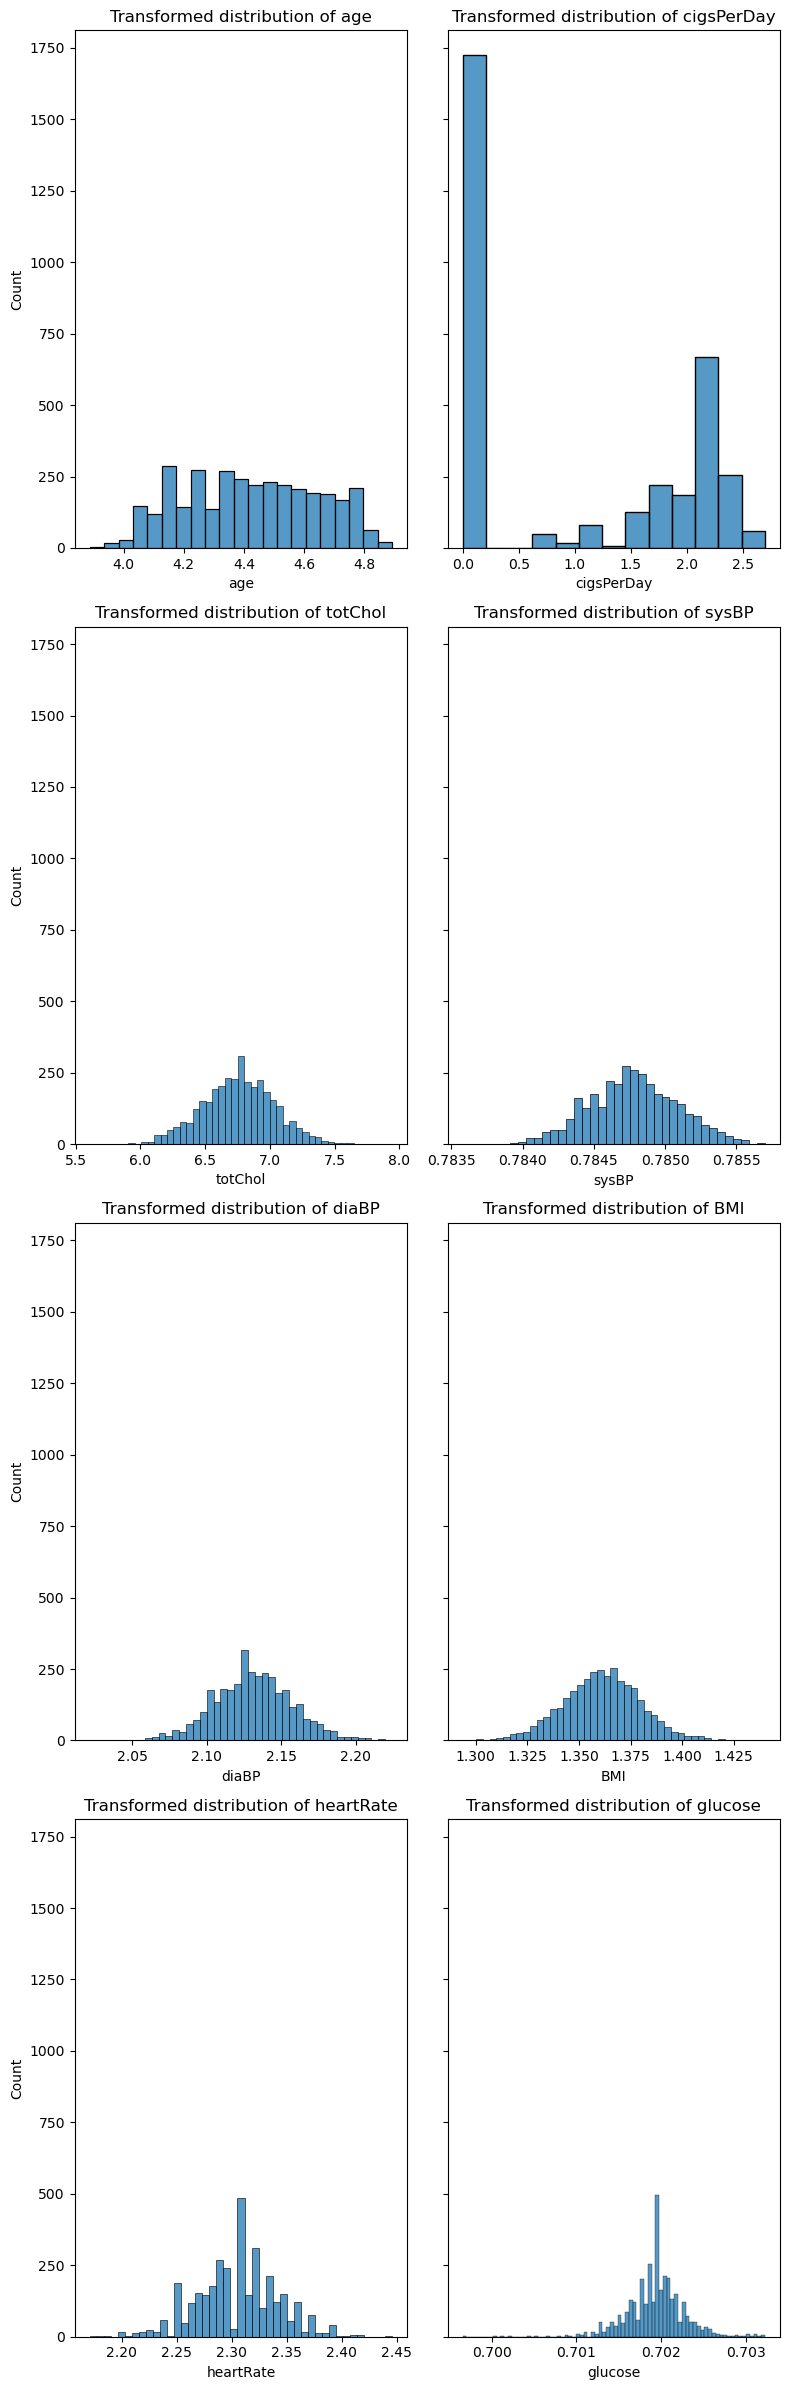

In [997]:
for col in continuous_features:
    if (chd_data[col] <= 0).any():
        chd_data[col] = chd_data[col] + 1
    chd_data[col], fitted_lambda = stats.boxcox(chd_data[col])
    
fig, axes = plt.subplots(4, 2, figsize=(8, 24), sharey=True)
for i, feature in enumerate(continuous_features):
    row = i // 2
    col = i % 2
    sns.histplot(data=chd_data, 
                  x=feature,
                  ax=axes[row, col],
                  legend=False,) 
    axes[row, col].set_title(f'Transformed distribution of {feature}')  

plt.tight_layout()
plt.show()


### Target variable

Text(0.5, 1.0, 'Count of Coronary Heart Disease')

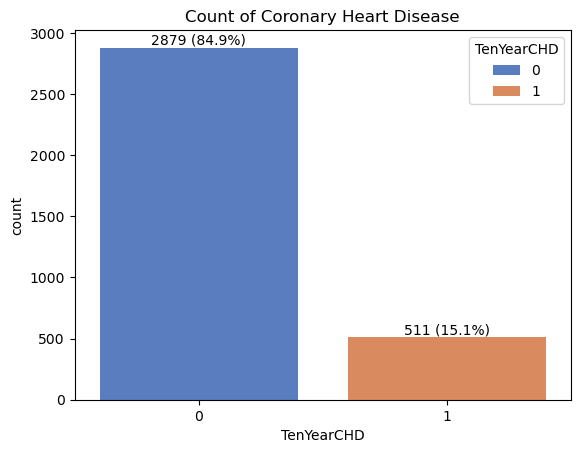

In [998]:
plot=sns.countplot(data=chd_data, 
            x="TenYearCHD",
            hue="TenYearCHD",
            palette="muted")
total = len(chd_data["TenYearCHD"])
for i in plot.containers:
    plot.bar_label(i,
                   labels=[f'{int(value.get_height())} ({value.get_height() / total * 100:.1f}%)' for value in i],
                   label_type="edge")
plt.title("Count of Coronary Heart Disease")

We can notice that the target variable has class imbalance.

Which gender has more risk of CHD

Text(0.5, 1.0, 'Count of Coronary Heart Disease')

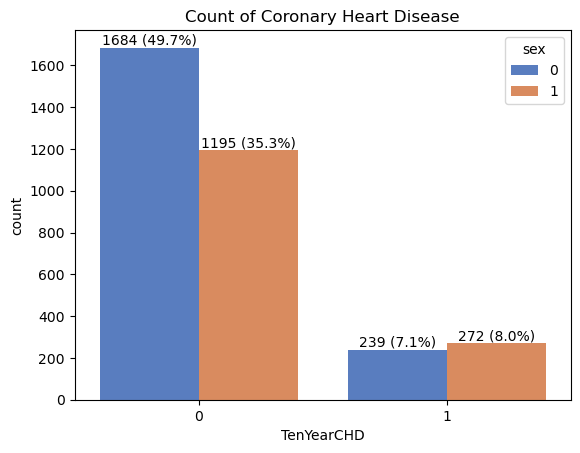

In [999]:
plot=sns.countplot(data=chd_data, 
            x="TenYearCHD",
            hue="sex", 
            palette="muted")
total = len(chd_data["TenYearCHD"])
for i in plot.containers:
    plot.bar_label(i,
                   labels=[f'{int(value.get_height())} ({value.get_height() / total * 100:.1f}%)' for value in i],
                   label_type="edge")
plt.title("Count of Coronary Heart Disease")

In the group of patients with heart disease there are more males.

Text(0, 0.5, 'Number of patients')

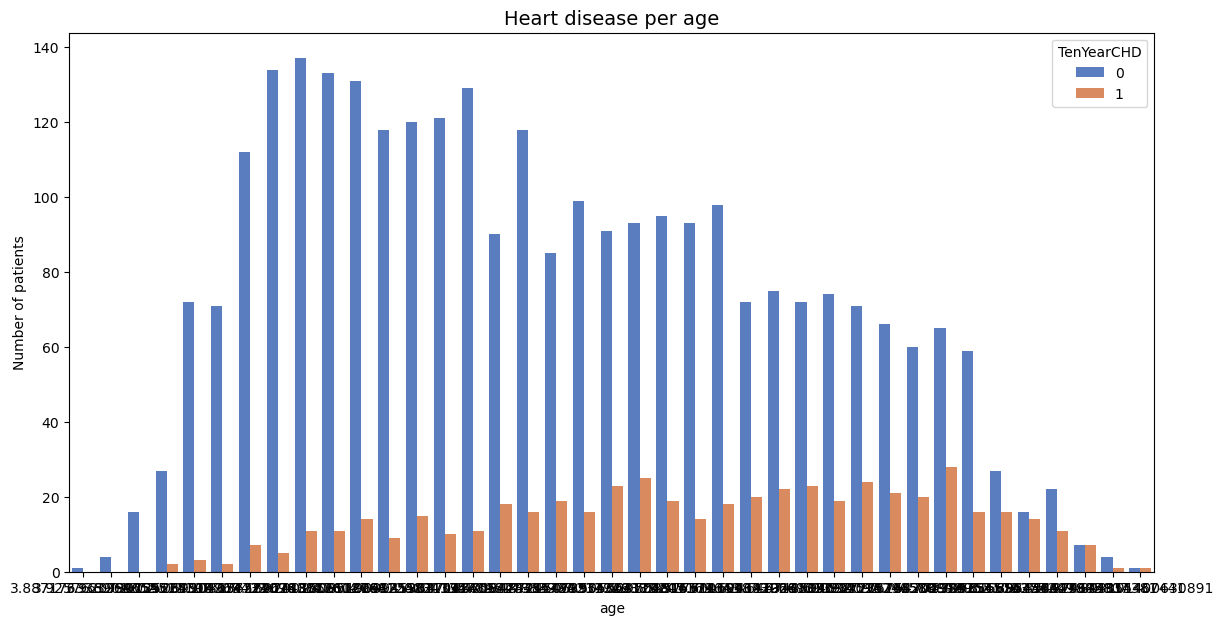

In [1000]:
plt.figure(figsize=(14,7))
sns.countplot(data=chd_data,
             x="age",
             hue="TenYearCHD",
             palette="muted")
plt.title("Heart disease per age", fontsize=14)
plt.ylabel("Number of patients")

We can see a slight increase in the number of patients with heart disease as the age is increasing.

### Correlation

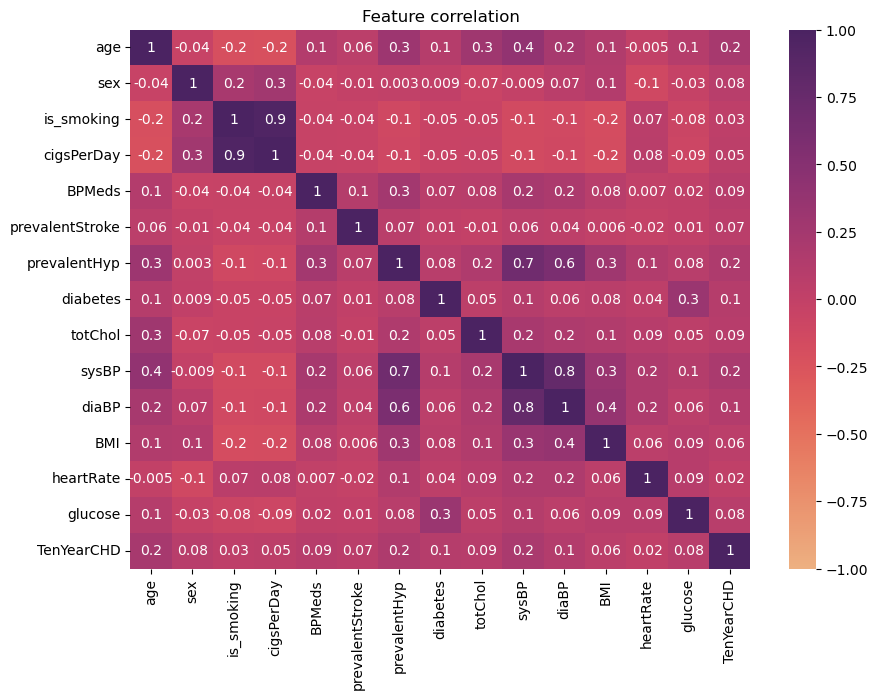

In [1001]:
corr = chd_data.corr()
plt.figure(figsize=(10,7))
heatmap = sns.heatmap(corr, annot=True, fmt=".1g", vmin=-1, vmax=1, cmap="flare")
plt.title("Feature correlation")
plt.show()

There is correlation between some of the features, it is better to remove them to avoid multicollinearity.

In [1002]:
all_cols = chd_data.columns.tolist()

vif_data = pd.DataFrame()
vif_data['feature'] = all_cols
vif_data['VIF'] = [round(variance_inflation_factor(chd_data[all_cols].values, i), 4) for i in range(len(all_cols))]

print(vif_data.sort_values(by='VIF', ascending=False))

            feature           VIF
9             sysBP  4.372906e+06
13          glucose  4.214588e+06
10            diaBP  1.291444e+04
11              BMI  6.354374e+03
12        heartRate  4.175638e+03
8           totChol  6.552502e+02
0               age  5.075036e+02
2        is_smoking  2.011350e+01
3        cigsPerDay  1.986070e+01
6      prevalentHyp  2.532300e+00
1               sex  2.090900e+00
14       TenYearCHD  1.289400e+00
7          diabetes  1.144800e+00
4            BPMeds  1.129800e+00
5   prevalentStroke  1.029600e+00


In [1003]:
chd_data = chd_data.drop(columns=["sysBP", "glucose", "is_smoking"])
chd_data.head()

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,diaBP,BMI,heartRate,TenYearCHD
id,,,,,,,,,,,,
0,4.775329,0,1.184010,0.0,0,0,0,6.674811,2.138480,1.361358,2.348113,1
1,4.035288,1,0.000000,0.0,0,1,0,6.612229,2.163868,1.380335,2.295417,0
2,4.347187,0,1.835411,0.0,0,0,0,6.861574,2.104334,1.331657,2.342980,0
3,4.454421,1,2.177930,0.0,0,1,0,6.754689,2.144795,1.374356,2.281286,1
4,4.775329,0,2.360580,0.0,0,0,0,6.805855,2.138480,1.366320,2.288486,0


### Scaling features

In [1004]:
chd_data_scaled = chd_data.copy()
continuous_cols = ["age", "cigsPerDay", "totChol", "diaBP", "BMI", "heartRate"]

scaler = StandardScaler()

chd_data_scaled[continuous_cols] = scaler.fit_transform(chd_data_scaled[continuous_cols])
chd_data_scaled.head()

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,diaBP,BMI,heartRate,TenYearCHD
id,,,,,,,,,,,,
0,1.566357,0,0.192719,0.0,0,0,0,-0.289445,0.275326,0.021802,1.167570,1
1,-1.736780,1,-0.943540,0.0,0,1,0,-0.512244,1.239757,1.021832,-0.247077,0
2,-0.344634,0,0.817848,0.0,0,0,0,0.375442,-1.021794,-1.543369,1.029756,0
3,0.134001,1,1.146553,0.0,0,1,0,-0.005075,0.515232,0.706747,-0.626458,1
4,1.566357,0,1.321836,0.0,0,0,0,0.177079,0.275326,0.283269,-0.433166,0


### Model 1

### Splitting the dataset

In [1005]:
# X: independent variables
# y: target value
X_input_model1 = chd_data_scaled.drop(columns=["TenYearCHD"])
y_target_model1 = chd_data_scaled["TenYearCHD"]

In [1006]:
X_model1_train, X_model1_test, y_model1_train, y_model1_test = train_test_split(X_input_model1, y_target_model1, test_size=0.2, random_state=1, stratify=y_target_model1)
X_model1_train.shape, X_model1_test.shape, y_model1_train.shape, y_model1_test.shape

((2712, 11), (678, 11), (2712,), (678,))

### Fitting the logistic model

In [1007]:
logreg1 = LogisticRegression(solver="liblinear")
logreg1.fit(X_model1_train, y_model1_train)

LogisticRegression(solver='liblinear')

In [1008]:
input1_cols = X_input_model1.columns
coefficients_model1 = logreg1.coef_[0]
intercept_model1 = logreg1.intercept_
print(f"The intercept is: {intercept_model1}")
coef_data = pd.DataFrame({"Feature": input1_cols, "Coefficient": coefficients_model1})
coef_data["Abs_Coefficient"] = coef_data["Coefficient"].abs()
coef_data_sorted = coef_data.sort_values(by="Abs_Coefficient", ascending=False).round(3)
coef_data_sorted

The intercept is: [-2.32058418]


,Feature,Coefficient,Abs_Coefficient
6,diabetes,0.844,0.844
4,prevalentStroke,0.780,0.780
0,age,0.623,0.623
1,sex,0.451,0.451
5,prevalentHyp,0.446,0.446
2,cigsPerDay,0.272,0.272
3,BPMeds,0.233,0.233
7,totChol,0.101,0.101
8,diaBP,0.072,0.072
10,heartRate,0.026,0.026


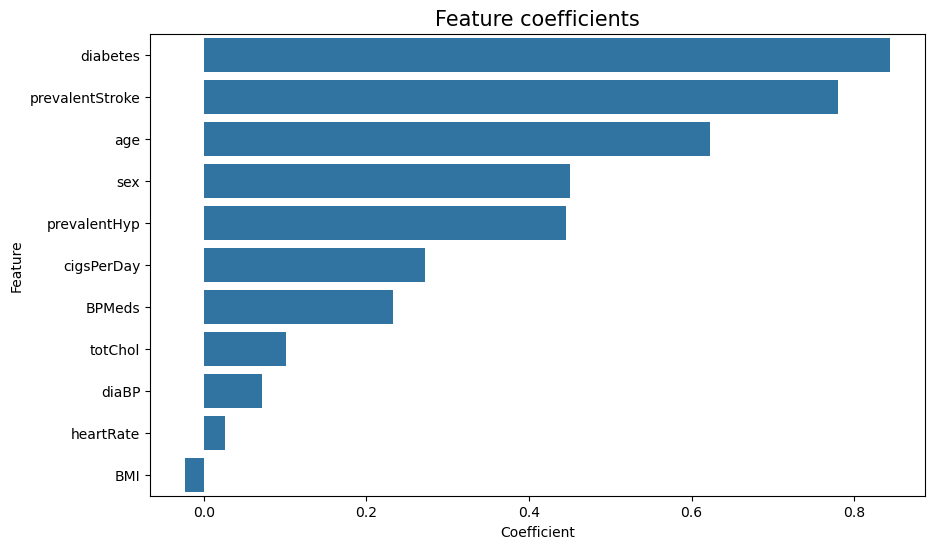

In [1009]:
plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=coef_data_sorted)
plt.title("Feature coefficients", fontsize=15)
plt.show()

In [1010]:
equation_model1 = f"Logistic Regression Model: log-odds(z) = {intercept_model1[0]:.4f}"
for coef, col in zip(coefficients_model1, input1_cols):
    equation_model1 += f"+ ({coef:.4f} * {col})"
equation_model1

'Logistic Regression Model: log-odds(z) = -2.3206+ (0.6229 * age)+ (0.4513 * sex)+ (0.2721 * cigsPerDay)+ (0.2328 * BPMeds)+ (0.7803 * prevalentStroke)+ (0.4457 * prevalentHyp)+ (0.8442 * diabetes)+ (0.1013 * totChol)+ (0.0716 * diaBP)+ (-0.0228 * BMI)+ (0.0262 * heartRate)'

### Evaluate the model

In [1011]:
y_model1_train_pred = logreg1.predict(X_model1_train)
y_model1_test_pred = logreg1.predict(X_model1_test)

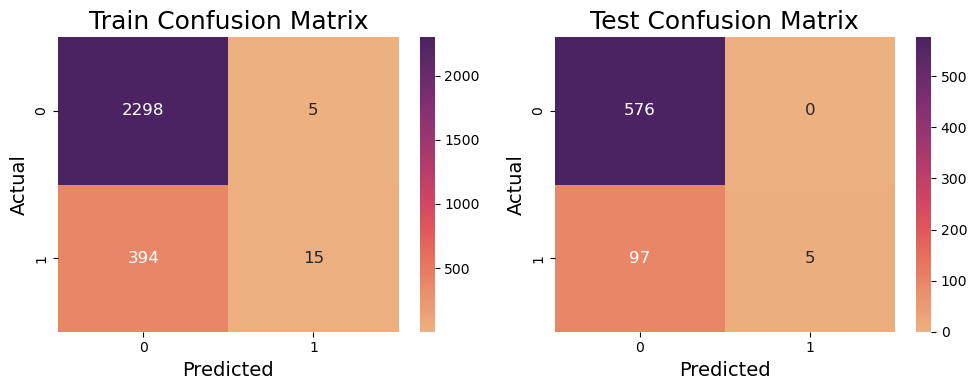

In [1012]:
conf_matrix_train1 = confusion_matrix(y_model1_train, y_model1_train_pred)
conf_matrix_test1 = confusion_matrix(y_model1_test, y_model1_test_pred)
conf_matrices = [conf_matrix_train1, conf_matrix_test1]
titles = ["Train Confusion Matrix", "Test Confusion Matrix"]

fig, axes = plt.subplots(1,2,figsize=(10,4))
for i,(matrix, title) in enumerate(zip(conf_matrices, titles)):
    sns.heatmap(matrix,
                annot=True,
                fmt="d",
                cmap="flare",
                xticklabels=["0", "1"],
                yticklabels=["0", "1"],
                annot_kws={"size": 12},
                ax=axes[i])
    axes[i].set_title(title, fontsize=18)
    axes[i].set_xlabel("Predicted", fontsize=14)
    axes[i].set_ylabel("Actual", fontsize=14)
plt.tight_layout()
plt.show()

In [1013]:
true_neg = conf_matrix_test1[0,0]
true_pos = conf_matrix_test1[1,1]
false_neg = conf_matrix_test1[1,0]
false_pos = conf_matrix_test1[0,1]
sensitivity = round(true_pos/(true_pos+false_neg), 3)
print(f"Sensitivity: {sensitivity} - correctly identified positived out of all actual positives.")
specificity = round(true_neg/(true_neg+false_pos), 3)
print(f"Specificity: {specificity} - correctly identified negatives out of all actual negatives.")
precision = round(true_pos/(true_pos+false_pos), 3)
print(f"Precision: {precision} - correctly identified positives out of all predicted positives.")

Sensitivity: 0.049 - correctly identified positived out of all actual positives.
Specificity: 1.0 - correctly identified negatives out of all actual negatives.
Precision: 1.0 - correctly identified positives out of all predicted positives.


In [1014]:
print(classification_report(y_model1_test, y_model1_test_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       576
           1       1.00      0.05      0.09       102

    accuracy                           0.86       678
   macro avg       0.93      0.52      0.51       678
weighted avg       0.88      0.86      0.80       678



The model performs well for category 0, but for category 1 the performance values are much lower.
The model could identify only 5% of the actual positive cases, the dataset is biased towards the negative cases.
Accuracy is very high, 86%, but it can be due to the data imbalance (high number of 0s).

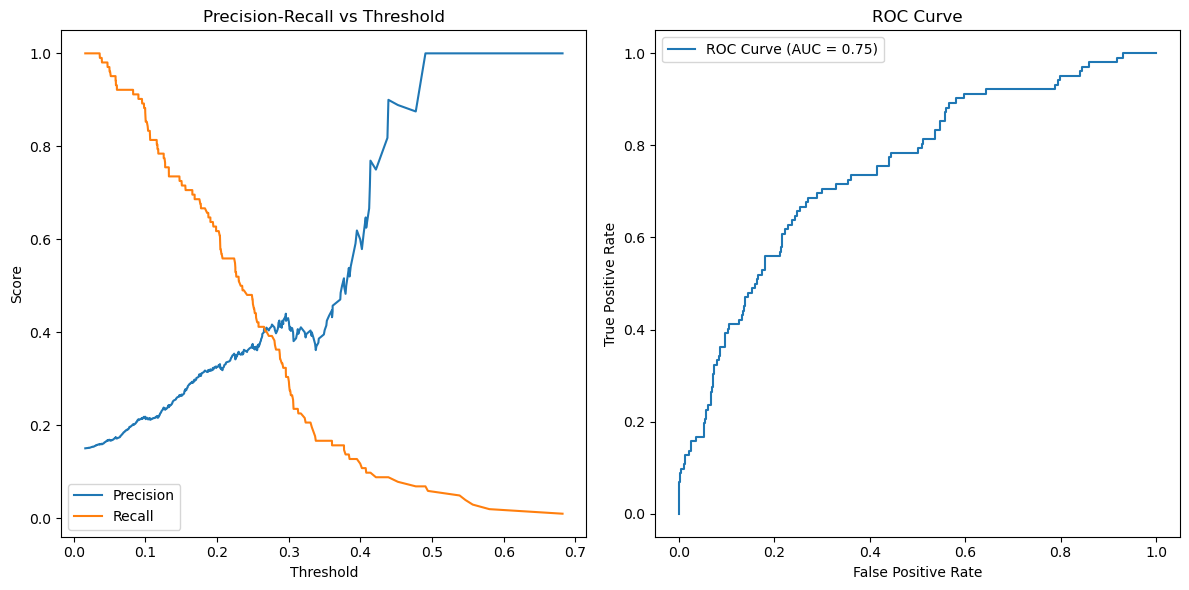

In [1015]:
roc_auc = roc_auc_score(y_model1_test, logreg1.predict_proba(X_model1_test)[:,1])
y_prob = logreg1.predict_proba(X_model1_test)[:,1]
precision, recall, thresholds_pr = precision_recall_curve(y_model1_test, y_prob)
fpr, tpr, thresholds_roc = roc_curve(y_model1_test, y_prob)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(thresholds_pr, precision[:-1], label='Precision')
plt.plot(thresholds_pr, recall[:-1], label='Recall')
plt.title('Precision-Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.tight_layout()
plt.show()

Low recall: the model fails to identify most of the positive cases.
High precision: when predicting positive cases, the model is precise (but only few positive cases are predicted due to low recall).
AUC is slightly better than previous model, but the difference is not significant.

### Lowering the threshold

In [1016]:
thresholds = np.arange(0.1, 0.5, 0.05)
for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    classification = classification_report(y_model1_test, y_pred)
    print(f"Threshold: {threshold:.2f}")
    print(classification)

Threshold: 0.10
              precision    recall  f1-score   support

           0       0.94      0.44      0.60       576
           1       0.21      0.85      0.34       102

    accuracy                           0.50       678
   macro avg       0.58      0.65      0.47       678
weighted avg       0.83      0.50      0.56       678

Threshold: 0.15
              precision    recall  f1-score   support

           0       0.93      0.64      0.76       576
           1       0.27      0.73      0.39       102

    accuracy                           0.66       678
   macro avg       0.60      0.68      0.57       678
weighted avg       0.83      0.66      0.70       678

Threshold: 0.20
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       576
           1       0.33      0.62      0.43       102

    accuracy                           0.75       678
   macro avg       0.62      0.70      0.63       678
weighted avg       0.83   

### Model 2

### Resampling imbalanced dataset and splitting the dataset

In [1017]:
chd_data_resampled = chd_data_scaled.copy()
X_input2 = chd_data_resampled.drop(columns=["TenYearCHD"])
y_target2 = chd_data_resampled["TenYearCHD"]

In [1018]:
X_model2_train, X_model2_test, y_model2_train, y_model2_test = train_test_split(X_input2, y_target2, test_size=0.2, random_state=1, stratify=y_target2)
X_model2_train.shape, X_model2_test.shape, y_model2_train.shape, y_model2_test.shape

((2712, 11), (678, 11), (2712,), (678,))

In [1019]:
smote = SMOTE(sampling_strategy="minority")
X_model2_train, y_model2_train = smote.fit_resample(X_model2_train, y_model2_train)

y_model2_train.value_counts()

TenYearCHD
0    2303
1    2303
Name: count, dtype: int64

In [1020]:
logreg2 = LogisticRegression(solver="liblinear")
logreg2.fit(X_model2_train, y_model2_train)

LogisticRegression(solver='liblinear')

In [1021]:
input2_cols = X_input2.columns
coefficients_model2 = logreg2.coef_[0]
intercept_model2 = logreg2.intercept_
print(f"The intercept is: {intercept_model2}")
coef_data = pd.DataFrame({"Feature": input2_cols, "Coefficient": coefficients_model2})
coef_data["Abs_Coefficient"] = coef_data["Coefficient"].abs()
coef_data_sorted = coef_data.sort_values(by="Abs_Coefficient", ascending=False).round(3)
coef_data_sorted

The intercept is: [-0.34755609]


,Feature,Coefficient,Abs_Coefficient
0,age,0.784,0.784
4,prevalentStroke,-0.520,0.520
2,cigsPerDay,0.385,0.385
8,diaBP,0.209,0.209
6,diabetes,-0.204,0.204
3,BPMeds,0.177,0.177
1,sex,0.140,0.140
7,totChol,0.105,0.105
5,prevalentHyp,0.078,0.078
10,heartRate,-0.037,0.037


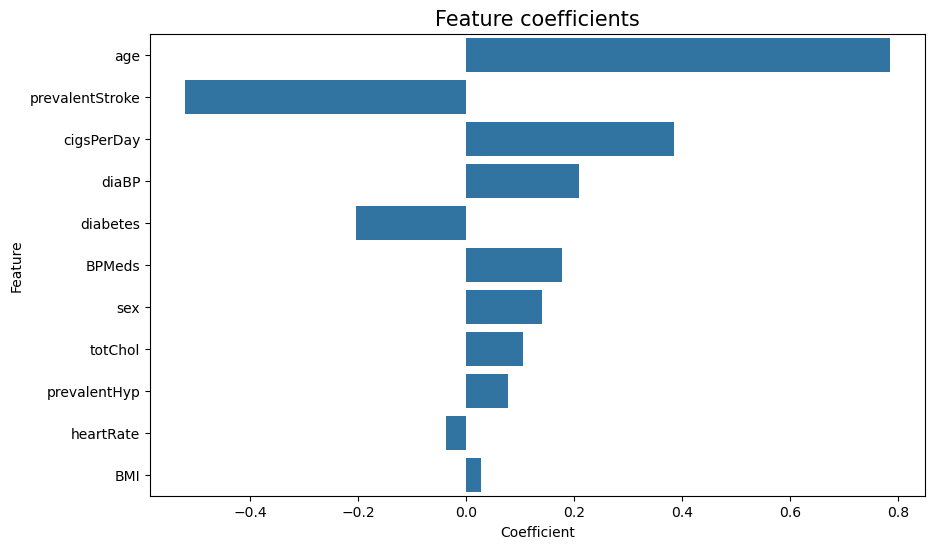

In [1022]:
plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=coef_data_sorted)
plt.title("Feature coefficients", fontsize=15)
plt.show()

In [1023]:
equation_model2 = f"Logistic Regression Model: log-odds(z) = {intercept_model2[0]:.4f}"
for coef, col in zip(coefficients_model2, input2_cols):
    equation_model2 += f"+ ({coef:.4f} * {col})"
equation_model2

'Logistic Regression Model: log-odds(z) = -0.3476+ (0.7840 * age)+ (0.1398 * sex)+ (0.3846 * cigsPerDay)+ (0.1770 * BPMeds)+ (-0.5196 * prevalentStroke)+ (0.0783 * prevalentHyp)+ (-0.2038 * diabetes)+ (0.1050 * totChol)+ (0.2087 * diaBP)+ (0.0271 * BMI)+ (-0.0367 * heartRate)'

## Evaluate the model

In [1024]:
y_model2_train_pred = logreg2.predict(X_model2_train)
y_model2_test_pred = logreg2.predict(X_model2_test)

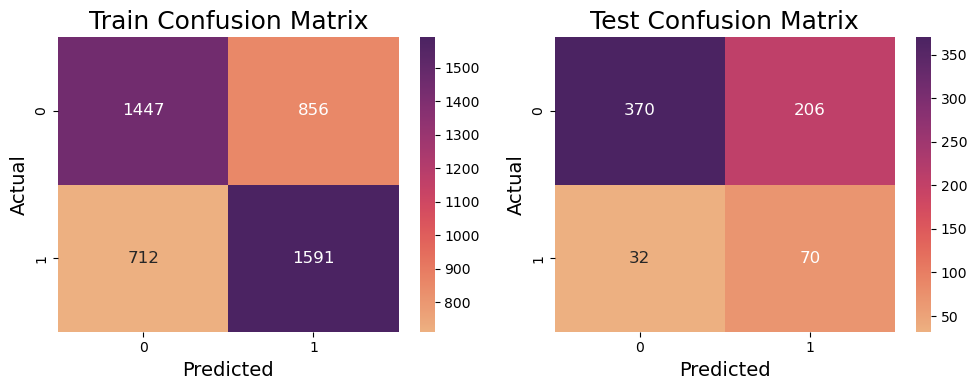

In [1025]:
conf_matrix_train2 = confusion_matrix(y_model2_train, y_model2_train_pred)
conf_matrix_test2 = confusion_matrix(y_model2_test, y_model2_test_pred)
conf_matrices = [conf_matrix_train2, conf_matrix_test2]
titles = ["Train Confusion Matrix", "Test Confusion Matrix"]

fig, axes = plt.subplots(1,2,figsize=(10,4))
for i,(matrix, title) in enumerate(zip(conf_matrices, titles)):
    sns.heatmap(matrix,
                annot=True,
                fmt="d",
                cmap="flare",
                xticklabels=["0", "1"],
                yticklabels=["0", "1"],
                annot_kws={"size": 12},
                ax=axes[i])
    axes[i].set_title(title, fontsize=18)
    axes[i].set_xlabel("Predicted", fontsize=14)
    axes[i].set_ylabel("Actual", fontsize=14)
plt.tight_layout()
plt.show()

In [1026]:
true_neg = conf_matrix_test2[0,0]
true_pos = conf_matrix_test2[1,1]
false_neg = conf_matrix_test2[1,0]
false_pos = conf_matrix_test2[0,1]
sensitivity = round(true_pos/(true_pos+false_neg), 3)
print(f"Sensitivity: {sensitivity} - correctly identified positives out of all actual positives.")
specificity = round(true_neg/(true_neg+false_pos), 3)
print(f"Specificity: {specificity} - correctly identified negatives out of all actuall negatives.")
precision = round(true_pos/(true_pos+false_pos), 3)
print(f"Precision: {precision} - correctly identified positives out of all predicted positives.")

Sensitivity: 0.686 - correctly identified positives out of all actual positives.
Specificity: 0.642 - correctly identified negatives out of all actuall negatives.
Precision: 0.254 - correctly identified positives out of all predicted positives.


In [1027]:
print(classification_report(y_model2_test, y_model2_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.64      0.76       576
           1       0.25      0.69      0.37       102

    accuracy                           0.65       678
   macro avg       0.59      0.66      0.56       678
weighted avg       0.82      0.65      0.70       678



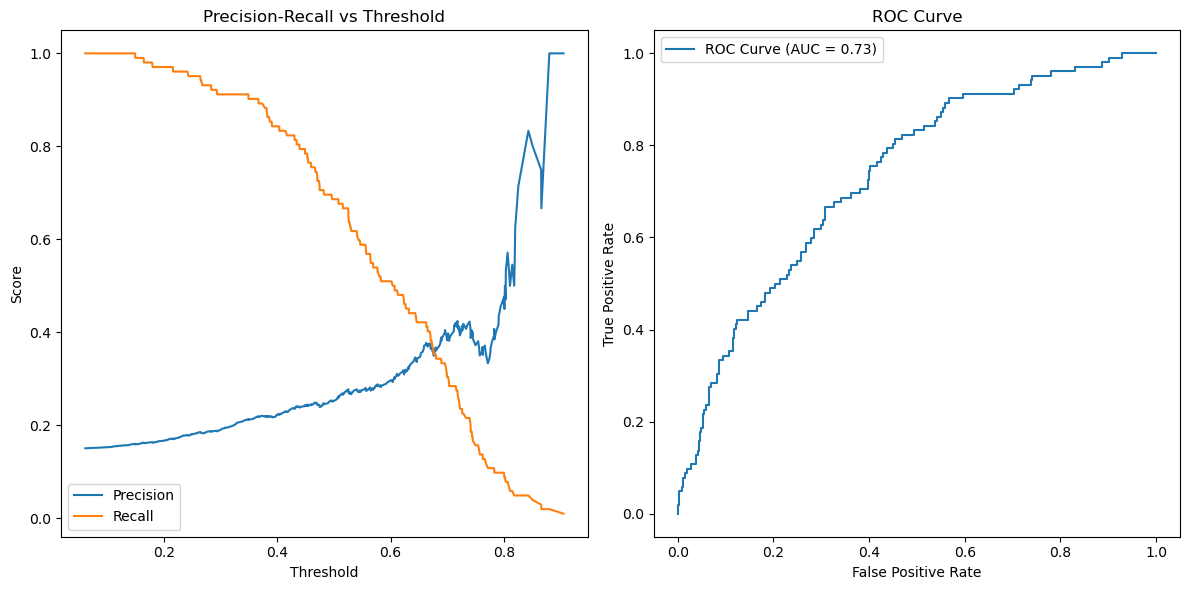

In [1028]:
roc_auc = roc_auc_score(y_model2_test, logreg2.predict_proba(X_model2_test)[:,1])
y_prob = logreg2.predict_proba(X_model2_test)[:,1]
precision, recall, thresholds_pr = precision_recall_curve(y_model2_test, y_prob)
fpr, tpr, thresholds_roc = roc_curve(y_model2_test, y_prob)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(thresholds_pr, precision[:-1], label='Precision')
plt.plot(thresholds_pr, recall[:-1], label='Recall')
plt.title('Precision-Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.tight_layout()
plt.show()

Recall and Precision are higher than in the previous models.
AUC is the same as Model2.

The predictions are more balanced, but the goal is to improve recall for the positive cases, even if it means more false positive cases too.

### Lowering the threshold

In [1029]:
thresholds = np.arange(0.1, 0.5, 0.05)
for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    classification = classification_report(y_model1_test, y_pred)
    print(f"Threshold: {threshold:.2f}")
    print(classification)


Threshold: 0.10
              precision    recall  f1-score   support

           0       1.00      0.02      0.04       576
           1       0.15      1.00      0.27       102

    accuracy                           0.17       678
   macro avg       0.58      0.51      0.15       678
weighted avg       0.87      0.17      0.07       678

Threshold: 0.15
              precision    recall  f1-score   support

           0       0.98      0.07      0.14       576
           1       0.16      0.99      0.27       102

    accuracy                           0.21       678
   macro avg       0.57      0.53      0.21       678
weighted avg       0.85      0.21      0.16       678

Threshold: 0.20
              precision    recall  f1-score   support

           0       0.97      0.14      0.25       576
           1       0.17      0.97      0.29       102

    accuracy                           0.27       678
   macro avg       0.57      0.56      0.27       678
weighted avg       0.85   

## Conclusion
- Feature scaling and balancing the data class both enhance the performance of the model.

- The best accuracy I could achieve with these models is 65-66%

- In both cases the threshold had to be lowered, to more successfully predict the positive cases.

- The most important factors to predict heart disease are: diabetes, age, prevalent stroke.

- Model improvement possibilities:
    - using more complex models
    - using different sampling methods
    - having more data
    - using less features